In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yale-faces/yalefaces/test/subject03.glasses.gif
/kaggle/input/yale-faces/yalefaces/test/subject12.normal.gif
/kaggle/input/yale-faces/yalefaces/test/subject02.leftlight.gif
/kaggle/input/yale-faces/yalefaces/test/subject13.sad.gif
/kaggle/input/yale-faces/yalefaces/test/subject06.leftlight.gif
/kaggle/input/yale-faces/yalefaces/test/subject11.glasses.gif
/kaggle/input/yale-faces/yalefaces/test/subject02.centerlight.gif
/kaggle/input/yale-faces/yalefaces/test/subject14.sad.gif
/kaggle/input/yale-faces/yalefaces/test/subject14.normal.gif
/kaggle/input/yale-faces/yalefaces/test/subject04.surprised.gif
/kaggle/input/yale-faces/yalefaces/test/subject01.happy.gif
/kaggle/input/yale-faces/yalefaces/test/subject09.rightlight.gif
/kaggle/input/yale-faces/yalefaces/test/subject15.rightlight.gif
/kaggle/input/yale-faces/yalefaces/test/subject09.sad.gif
/kaggle/input/yale-faces/yalefaces/test/subject15.sad.gif
/kaggle/input/yale-faces/yalefaces/test/subject07.happy.gif
/kaggle/input/

In [2]:
%config Completer.use_jedi = False

In [3]:
!pip install --force-reinstall opencv-contrib-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 28.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.5.4.60
    Uninstalling opencv-contrib-python-4.5.4.60:
      Successfully uninstalled opencv-contrib-python-4.5.4.60
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
tfx-bsl 1.8.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.48.0 which

In [4]:
from PIL import Image
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn
import cv2
import matplotlib.pyplot as plt
import matplotlib.figure as figure
import os
import dlib


# **LBPH** - Pré-Processamento das imagens

In [5]:
def get_image_data():
    paths = [os.path.join('../input/yale-faces/yalefaces/train', f) for f in os.listdir('../input/yale-faces/yalefaces/train')]  
    faces = []
    ids = []
    
    for path in paths:
        img = Image.open(path).convert('L')
        img_np = np.array(img, 'uint8')
        id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
        ids.append(id)
        faces.append(img_np)
    return np.array(ids), faces

In [6]:
ids, faces = get_image_data()

# **LBPH** - Treinamento de classificação

In [7]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius=4, neighbors=14, grid_x=9, grid_y=9)
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

# Face Recognition LBPH

In [8]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('lbph_classifier.yml')

In [9]:
imagem_teste = '../input/yale-faces/yalefaces/test/subject05.surprised.gif'

In [10]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')

In [11]:
predict = lbph_face_classifier.predict(imagem_np)
expected = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))

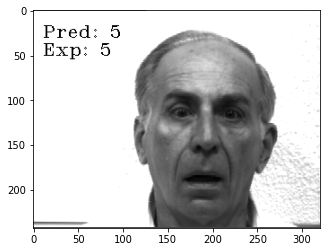

In [12]:
cv2.putText(imagem_np, 'Pred: ' + str(predict[0]), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 255))
cv2.putText(imagem_np, 'Exp: ' + str(expected), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
plt.imshow(imagem_np, cmap="gray")

# Classifier Rating

In [13]:
paths = [os.path.join('../input/yale-faces/yalefaces/test', f) for f in os.listdir('../input/yale-faces/yalefaces/test')]
predictions = []
results = []

for path in paths:
  img = Image.open(path).convert('L')
  img_np = np.array(img, 'uint8')
  predict, _ = lbph_face_classifier.predict(img_np)
  result = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

  predictions.append(predict)
  results.append(result) 

In [14]:
predictions = np.array(predictions)
results = np.array(results)

In [15]:
accuracy_score(results, predictions)

0.7

In [16]:
cm = confusion_matrix(results, predictions)
cm

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

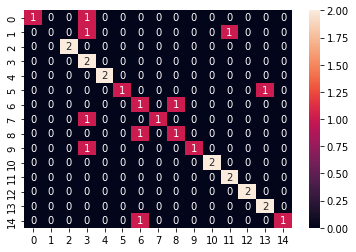

In [17]:
seaborn.heatmap(cm, annot=True);

# DLIB

In [18]:
dlib_detector_face = dlib.get_frontal_face_detector()
dlib_detector_dots = dlib.shape_predictor('../input/shape-predictor/shape_predictor_68_face_landmark.dat')

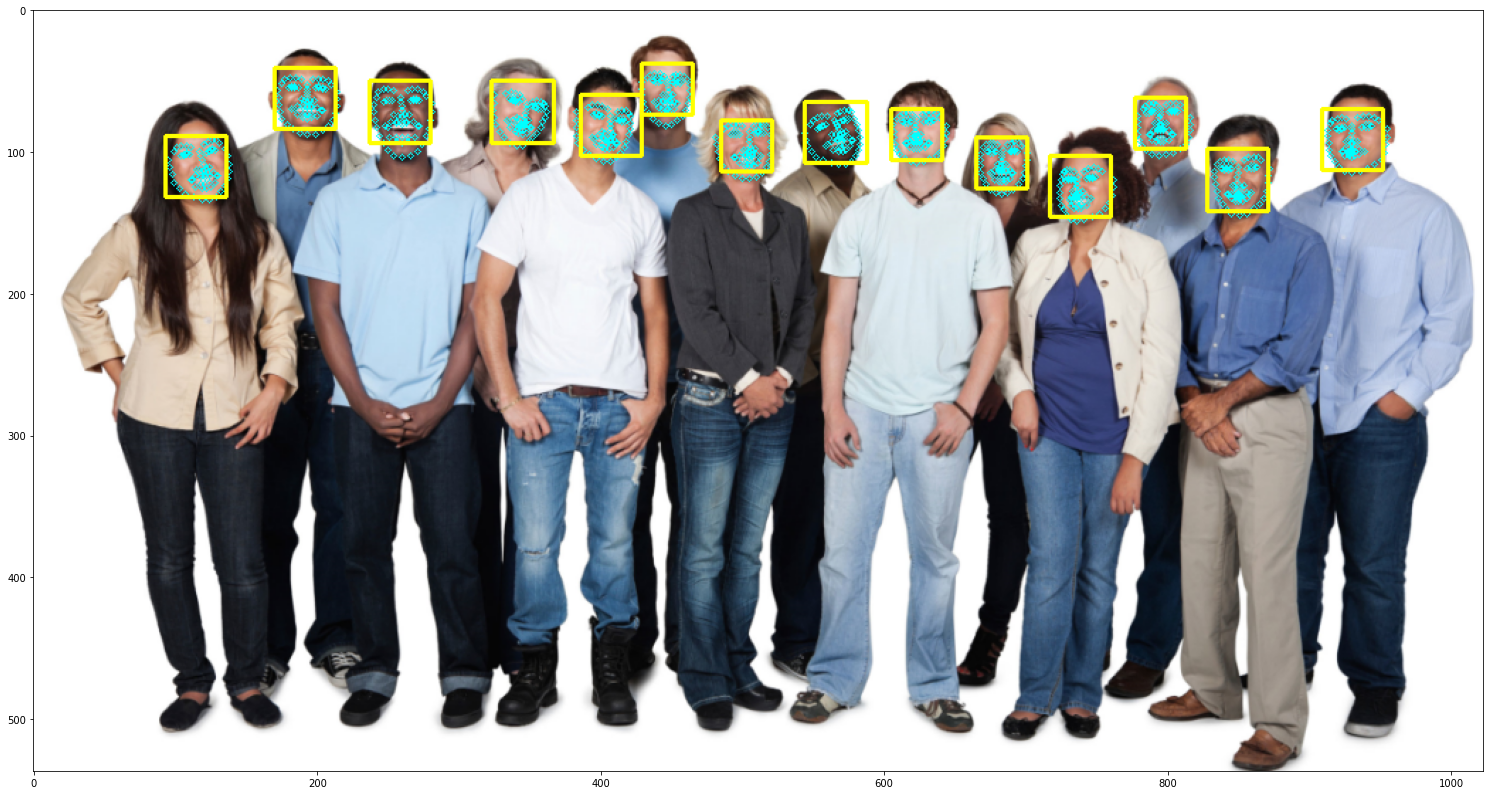

In [19]:
img_dlib_test = cv2.imread('../input/people2/people2.jpg')
dlib_detect = dlib_detector_face(img_dlib_test, 1)
for face in dlib_detect:
    dots = dlib_detector_dots(img_dlib_test, face)
    
    for dot in dots.parts():
        cv2.circle(img_dlib_test, (dot.x, dot.y), 2, (255, 255, 0), 1)
    
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(img_dlib_test, (l, t), (r, b), (0, 255, 255), 2)


plt.figure(figsize = (35,14))
img_dlib_test = cv2.cvtColor(img_dlib_test, cv2.COLOR_BGR2RGB)
plt.imshow(img_dlib_test)

In [20]:
dlib_detector_face = dlib.get_frontal_face_detector()
dlib_detector_dots = dlib.shape_predictor('../input/shape-predictor/shape_predictor_68_face_landmark.dat')
descriptor_face_extractor = dlib.face_recognition_model_v1('../input/shapepredictor/dlib_face_recognition_resnet_model_v1.dat')

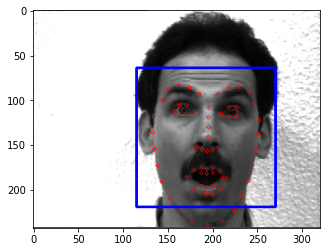

In [21]:
index = {}
idx = 0
facial_descriptors = None

paths = [os.path.join('../input/yale-faces/yalefaces/train', f) for f in os.listdir('../input/yale-faces/yalefaces/train')]

for path in paths:
    dlib_img = Image.open(path).convert('RGB')
    dlib_img_np = np.array(dlib_img, 'uint8')
    dlib_detections = dlib_detector_face(dlib_img_np, 1)    
    for face in dlib_detections:
        l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
        cv2.rectangle(dlib_img_np, (l, t), (r, b), (0, 0, 255), 2)
        dots = dlib_detector_dots(dlib_img_np, face)
        
        for dot in dots.parts():
            cv2.circle(dlib_img_np, (dot.x, dot.y), 2, (255, 0, 0), 1)
            
        descriptor_face = descriptor_face_extractor.compute_face_descriptor(dlib_img_np, dots)
        descriptor_face = [f for f in descriptor_face]
        descriptor_face = np.asarray(descriptor_face, dtype=np.float64)
        descriptor_face = descriptor_face[np.newaxis, :]
        
        if facial_descriptors is None:
            facial_descriptors = descriptor_face
        else:
            facial_descriptors = np.concatenate((facial_descriptors, descriptor_face), axis = 0)
        
        index[idx] = path
        idx += 1
    plt.imshow(dlib_img_np)
    #plt.show()

In [22]:
facial_descriptors.shape

(132, 128)

In [23]:
facial_descriptors[131]

array([-1.39287576e-01,  7.63202831e-02, -4.49867286e-02, -8.08274467e-03,
       -8.61943737e-02, -2.93659270e-02, -2.12253537e-02, -4.41696234e-02,
        1.99469373e-01, -4.51462716e-03,  2.54320383e-01, -3.85785699e-02,
       -2.77880043e-01, -2.79525667e-02, -5.34284264e-02,  1.16575710e-01,
       -1.56516805e-01,  2.18100287e-03, -1.25402898e-01, -1.58018693e-01,
        7.20905438e-02,  1.46657050e-01,  2.23133583e-02,  1.44136092e-03,
       -1.94908679e-01, -2.87814528e-01, -3.66655290e-02, -9.74278077e-02,
        3.72882634e-02, -1.74876928e-01, -3.87225226e-02,  1.24624997e-01,
       -1.47626147e-01, -7.37059340e-02,  4.36555669e-02,  5.88525012e-02,
       -3.80428769e-02, -3.58937234e-02,  1.60315737e-01,  7.76480585e-02,
       -7.35705644e-02,  3.25686634e-02,  6.22188486e-02,  2.81205744e-01,
        1.41924709e-01, -1.49590094e-02,  2.73170676e-02, -1.43129826e-01,
        6.04852214e-02, -2.59026259e-01,  4.24119309e-02,  1.75310448e-01,
        9.08415616e-02,  

In [24]:
np.linalg.norm(facial_descriptors[0] - facial_descriptors, axis = 1)

array([0.        , 0.74103349, 0.76165983, 0.37300732, 0.67679517,
       0.7165205 , 0.67875532, 0.61912442, 0.70541055, 0.72881304,
       0.74469309, 0.58680488, 0.71482209, 0.74724734, 0.75428856,
       0.60368591, 0.76574728, 0.34737652, 0.60000813, 0.74537405,
       0.74776145, 0.77371382, 0.60135941, 0.65688957, 0.8224253 ,
       0.66225409, 0.74145072, 0.75354902, 0.70095365, 0.65751038,
       0.66696346, 0.79409927, 0.71566236, 0.71728242, 0.68481447,
       0.63753968, 0.63634555, 0.63187872, 0.71821484, 0.6414117 ,
       0.52162335, 0.7397402 , 0.66968498, 0.67627865, 0.71805422,
       0.63286592, 0.80595794, 0.72115228, 0.65362252, 0.70612478,
       0.66362823, 0.69824234, 0.68957906, 0.76754279, 0.62446333,
       0.45660482, 0.71933231, 0.77022193, 0.70515313, 0.69006168,
       0.67800709, 0.66300167, 0.6986284 , 0.67516839, 0.74130486,
       0.65056834, 0.64815537, 0.60000813, 0.40515684, 0.33861451,
       0.79527792, 0.64110427, 0.81406804, 0.73486976, 0.71060

In [25]:
np.argmin(np.linalg.norm(facial_descriptors[0] - facial_descriptors[1:], axis = 1))

68

In [26]:
np.linalg.norm(facial_descriptors[0] - facial_descriptors[1:], axis = 1)[68]

0.33861451172610385

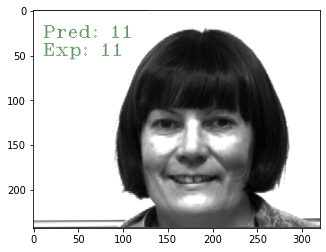

In [27]:
min_trust = 0.5
predicts = []
expected_results = []

paths = [os.path.join('../input/yale-faces/yalefaces/test', f) for f in os.listdir('../input/yale-faces/yalefaces/test')]

for path in paths:
    img = Image.open(path).convert('RGB')
    img_np = np.array(img, 'uint8')
    detect_face = dlib_detector_face(img_np, 1)
    for face in detect_face:
        dots = dlib_detector_dots(img_np, face)
        descriptor_face = descriptor_face_extractor.compute_face_descriptor(img_np, dots)
        descriptor_face = [f for f in descriptor_face]
        descriptor_face = np.asarray(descriptor_face, dtype=np.float64)
        descriptor_face = descriptor_face[np.newaxis, :]
        
        distances = np.linalg.norm(descriptor_face - facial_descriptors, axis = 1)
        min_index = np.argmin(distances)
        min_distance = distances[min_index]
        if min_distance <= min_trust:
            prediction_name = int(os.path.split(index[min_index])[1].split('.')[0].replace('subject', ''))
        else:
            prediction_name = 'Face não identificada'
            
        real_name = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
        
        predicts.append(prediction_name)
        expected_results.append(real_name)
        
        cv2.putText(img_np, 'Pred: ' + str(prediction_name), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (100,150,100))
        cv2.putText(img_np, 'Exp: ' + str(real_name), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (100,150,100))

    plt.imshow(img_np)
    #plt.show()
    
predicts = np.array(predicts)
expected_results = np.array(expected_results)

In [28]:
accuracy_score(expected_results, predicts)

1.0